## Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


### Class 12 - Forced vibration of multi degree of freedom systems

[1.   The Rayleigh quotient](#section_1)  
[2.   Modal superposition](#section_2)  
[3.   Elastic solution from modal analysis](#section_3)  
[4.   Examples of dynamic response](#section_4)  
[5.   Assignment](#section_5)  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [8]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt
import pickle as pk

# Load matrices generated in Class 10 and 11 (those notebooks must be run firstly!)

with open('data/sample_KM.pk', 'rb') as KM:
    K1, M1, K2, M2, K3, M3 = pk.load(KM)

with open('data/sample_EGV.pk', 'rb') as EGV:
    wk1, Phi1, wk2, Phi2, wk3, Phi3 = pk.load(EGV)


## 1. The Rayleigh quotient <a name="section_1"></a> 

Iteration converging to the first eigenvector/eigenvalue:


In [9]:
qk = np.ones((3,1))/np.sqrt(3)   # initial guess for eigenvector

D  = np.dot(np.linalg.inv(K3),M3)
lb = float(np.dot(qk.T,np.dot(D, qk)))

print('Initial guess:       ', 1/np.sqrt(lb), qk.T[0])

for i in range(3):
    qk = np.dot(D, qk)
    qk = qk/np.linalg.norm(qk)
    lb = float(np.dot(qk.T,np.dot(D, qk)))
    
    print('Iteration number {0}:  '.format(i+1), 1/np.sqrt(lb), qk.T[0])

print('\nSolution from scipy: ',wk3[0], Phi3[:,0].T)


Initial guess:        35.38946880679624 [0.57735027 0.57735027 0.57735027]
Iteration number 1:   34.043883977015206 [0.71713717 0.5976143  0.35856858]
Iteration number 2:   34.023769228784474 [0.73435802 0.59222421 0.33164556]
Iteration number 3:   34.02345167206512 [0.73663472 0.59118455 0.32843586]

Solution from scipy:  34.023446468880074 [0.73697623 0.59100905 0.32798528]


Eigenvector-eigenvalue from some elastic deformation:


In [10]:
# self weight applied at horizontal
F = 9.81*np.dot(M3, np.ones((3,1)))

# static displacements (may be external info)
u = np.linalg.solve(K3, F)

# Elastic energy is equal to work done by external forces
V = np.sum(F*u)/2

# Reference kinetic energy (with displacements)
Tref = float(np.dot(u.T, np.dot(M3, u))/2)

# Eigenvalue estimation
fk = np.sqrt(V/Tref)/2/np.pi

print('Estimated from Rayleigh quotient: {0:4.2f} Hz'.format(fk))
print('Previously calculated with scipy: {0:4.2f} Hz'.format(wk3[0]/2/np.pi))


Estimated from Rayleigh quotient: 5.44 Hz
Previously calculated with scipy: 5.41 Hz


## 2. Modal Superposition <a name="section_2"></a> 


## 3. Elastic solution from modal analysis <a name="section_3"></a> 

<img src="images/simply_suported.png" alt="simply supported beam" width="400px"/>


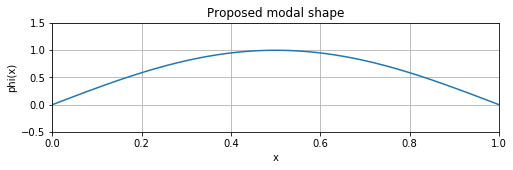

In [11]:
L  = 1         # bar length (m)
EI = 17.96     # bending stiffness (Nm2)
mu = 0.260     # mass per unity length (kg/m)
q  = 20000     # distributed load (N/m)

# Proposed modal shape for first mode
x  = np.linspace(0, L, 200)
qk = np.sin(np.pi*x/L)

plt.figure(1, figsize=(8,2))
plt.plot(x, qk)
    
plt.xlim( 0.0, L  );  plt.xlabel('x');
plt.ylim(-0.5, 1.5);  plt.ylabel('phi(x)');
plt.title('Proposed modal shape')
plt.grid(True)


In [12]:
wk = np.sqrt(EI/mu)*(np.pi/L)**2
Mk = np.sum(mu*qk*qk)
Kk = wk*wk*Mk

print('Available fundamental vibration frequency: {0:7.1f} rad/s'.format(wk))
print('Modal mass (integrated over bar length):   {0:7.1f} kg'.format(Mk))
print('Modal stiffness (from mass and frequency): {0:7.0f} N/m'.format(Kk))


Available fundamental vibration frequency:    82.0 rad/s
Modal mass (integrated over bar length):      25.9 kg
Modal stiffness (from mass and frequency):  174072 N/m


In [13]:
Fk = np.sum(q*qk)         # modal force
uk = Fk/Kk                # modal displacement
up = np.max(uk*qk)        # maximum displacement

u0 = (5*q*L**4)/(384*EI)  # theoretical maximum displacement

print('Maximum displacement approximation: {0:5.2f}m'.format(up))
print('Theoretical maximum displacement:   {0:5.2f}m'.format(u0))


Maximum displacement approximation: 14.55m
Theoretical maximum displacement:   14.50m


In [14]:
u    = uk*qk
V    = np.sum(q*u)
Tref = np.sum(mu*u*u)
wk   = np.sqrt(V/Tref)

print('Fundamental frequency from Rayleigh quotient: {0:7.1f} rad/s'.format(wk))


Fundamental frequency from Rayleigh quotient:    82.0 rad/s


## 4. Examples of dynamic response <a name="section_4"></a> 


In [15]:
print(wk2)

[ 29.3363517  289.04184917]


## 5. Assignments <a name="section_5"></a> 

